<a href="https://colab.research.google.com/github/Haxxanali012/DataScienceAnalytics/blob/main/Lab8_20sw012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **Name: M Hassan**

  **Roll no: 20sw012**

  **Section: ii**

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [ ]:
df = pd.read_csv('ab_data.csv')

In [ ]:
df.shape

(294478, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
users_unique = df.user_id.nunique()
users_unique

290584

In [ ]:
df[df.converted == 1].user_id.count()/df.shape[0]
df.converted.mean()

0.11965919355605512

In [ ]:
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].user_id.count() + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].user_id.count()

3893

In [ ]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [ ]:
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [ ]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [ ]:
df2.user_id.nunique()

290584

In [ ]:
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [ ]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

In [ ]:
# quick sanity check
df2.user_id.nunique()

290584

In [ ]:
df2.converted.mean()

# alternatively
df2.describe().loc['mean'].converted

0.11959708724499628

In [ ]:
# logic: query the converted column where group column value is control and take mean
df2.converted[df2.group == 'control'].mean()

0.1203863045004612

In [ ]:
# same logic as above, here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.11880806551510564

In [ ]:
df2[df2.landing_page == 'new_page'].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

In [ ]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.11959708724499628

In [ ]:
p_old = df2.converted.mean() # the same!!!
p_old

0.11959708724499628

In [ ]:
# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

145310

In [ ]:
# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old

145274

In [ ]:
# simulating n_new transaction that have probabiliy of receiving new page, using binomial gives the outout as the number of 1's
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.12114789071639942

In [ ]:
# alternatively
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
new_converted_simulation.mean()

0.11958600853348014

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
# simulating n_new transaction that have probabiliy of having old page, using binomial gives the outout as the number of 1's
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11943637540096645

In [ ]:
# alternatively
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
old_converted_simulation.mean()

0.11958781750347619

In [ ]:
# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

0.0017115153154329682

In [ ]:
# alternatively
new_converted_simulation.mean() - old_converted_simulation.mean()

-1.8089699960477379e-06

In [ ]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [ ]:
# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation

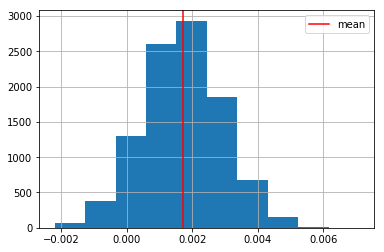

In [ ]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

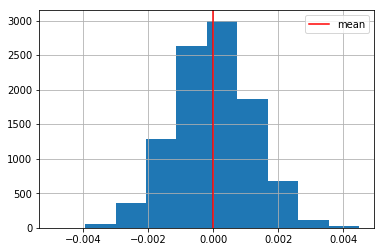

In [ ]:
# alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();

In [ ]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()

0.99719999999999998

In [ ]:
# alternatively
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs_alt).mean()

0.90780000000000005

In [ ]:
# quick check before diving in
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

C:\Users\Prayag\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [ ]:
# quick consistency check
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
# copy the dataframe to a new one, for clarity
df2_copy = df2.copy()

In [ ]:
# another sanity check, if True, go ahead
df2_copy.shape == df2.shape

True

In [ ]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

In [ ]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove those
df2_copy.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

In [ ]:
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


In [ ]:
logit_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:06:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

In [ ]:
# interprete the coefficients
1/np.exp(results.params[1])

1.0151020136964777

In [ ]:
# additional: question posed by previous reviewer
# how to get p-value as if it were a one-tailed test
1-0.190/2

0.905

In [ ]:
# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

In [ ]:
# read file and join the dfs
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [ ]:
# quick check
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [ ]:
# Create the necessary dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

In [ ]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['us'], axis=1, inplace=True)

In [ ]:
df_new.head()

,country,timestamp,group,landing_page,converted,canada,uk
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [ ]:
# fitting linear model
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','canada','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        22:06:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
canada        -0.0408      0.027     -1.518      0.129      -0.093       0.012
uk             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [ ]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)